In [1]:
from skimage import io
from skimage import data
import numpy as np
####################################
# 練習
# raster scan of the image of "2"
two_v = [0,0,255,255,255,255,0,0,255,0,0,0,255,0,0,0,0,0,0,255,0,0,255,255,255,255,255,0,0,255,0,0,0,0,0,0,255,0,0,0,0,0,0,255,255,255,255,255,0]

# Transfor to a numpy array
two_a = np.array(two_v)

# reshape to the size of the image
two = two_a.reshape((7,7))

print( two )

[[  0   0 255 255 255 255   0]
 [  0 255   0   0   0 255   0]
 [  0   0   0   0   0 255   0]
 [  0 255 255 255 255 255   0]
 [  0 255   0   0   0   0   0]
 [  0 255   0   0   0   0   0]
 [  0 255 255 255 255 255   0]]


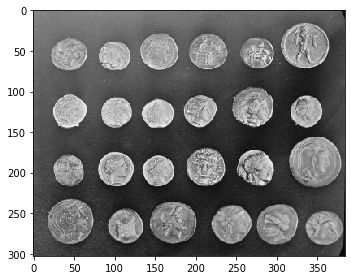

In [2]:
# skimage.dataに用意されているcoin画像を読み込み
coins = data.coins()
io.imshow(coins)
io.show()

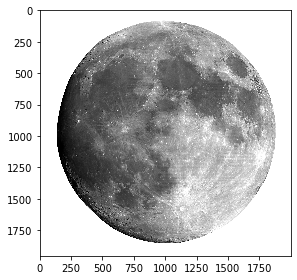

In [3]:
# ファイルから月画像を読み込み
data_dir = './ImgData/'
filename = data_dir + 'moon.png'
moon = io.imread(filename)
io.imshow(moon)
io.show()

In [4]:
print( "Dimensions of the coin image: ", coins.shape )
print( "Dimensions of the moon image: ", moon.shape )

print( "Minimum value for image coins: ", coins.min() )
print( "Maximum value for image coins: ", coins.max() )
print( "Average value for image coins: ", coins.mean() )

print( "pixel value of image coins at location (200,100): ", coins[200,100] )
print( "pixel value of image moon at location (100,300): ", moon[100,300] )

coins[200,100] = 0
print( "New value of image coins at pixel (200,100): ", coins[200,100] )


Dimensions of the coin image:  (303, 384)
Dimensions of the moon image:  (1955, 2000, 4)
Minimum value for image coins:  1
Maximum value for image coins:  252
Average value for image coins:  96.85551602035204
pixel value of image coins at location (200,100):  165
pixel value of image moon at location (100,300):  [255 255 255   0]
New value of image coins at pixel (200,100):  0


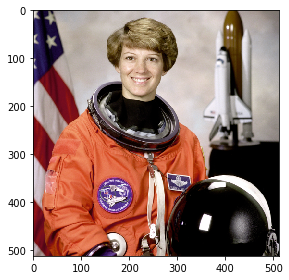

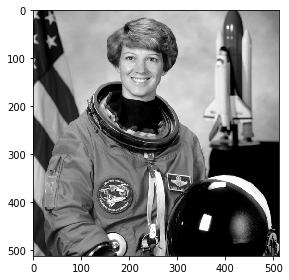

(512, 512, 3)
(512, 512)


In [5]:
from skimage.color import rgb2gray # Load the function for conversion
from skimage import data
from skimage import io
img = data.astronaut() # load the input image
img_gray = rgb2gray(img) # convert to gray image
io.imshow(img)
io.show()
io.imshow(img_gray)
io.show()
print(img.shape)
print(img_gray.shape)

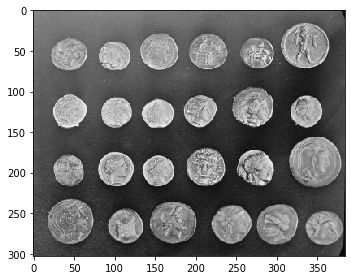

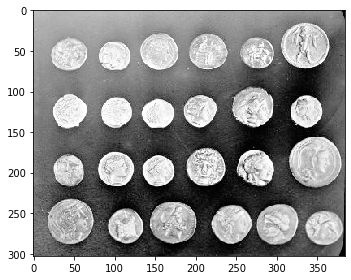

In [6]:
# コントラスト強調
coins = data.coins()
io.imshow(coins)
io.show()

from skimage import exposure
im1 = exposure.equalize_hist(coins) # コンストラクト補正
io.imshow(im1)
io.show()

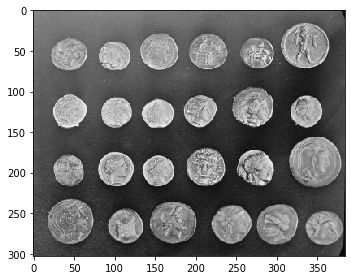

C:\Users\suke0\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


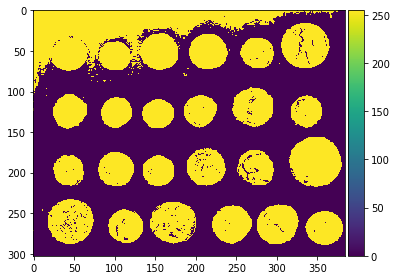

In [7]:
###### Segmentation ###########
import numpy as np
from skimage import data, io
coins = data.coins()
io.imshow(coins)
io.show()


segmented_img = np.zeros(coins.shape)
mask = coins[:,:] > 100 # 画素が100より高ければ前景に
segmented_img[mask] = 255 # 前景を塗りつぶす
io.imshow(segmented_img)
io.show()


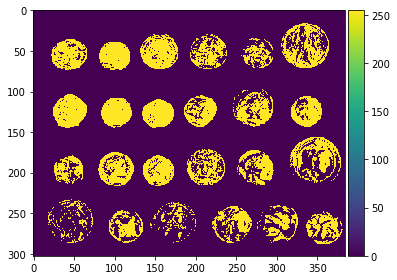

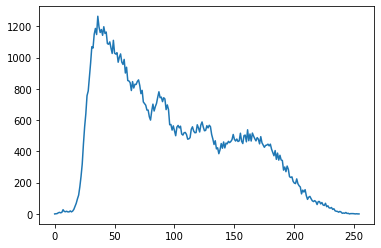

In [8]:
segmented_img = np.zeros(coins.shape)
mask = coins[:,:] > 150 # 閾値を150に
segmented_img[mask] = 255
io.imshow(segmented_img)
io.show()

# 画素の値をヒストグラムに
import matplotlib.pyplot as plt
histo = np.histogram(coins, bins=np.arange(0, 256))
plt.plot(histo[1][0:255], histo[0])


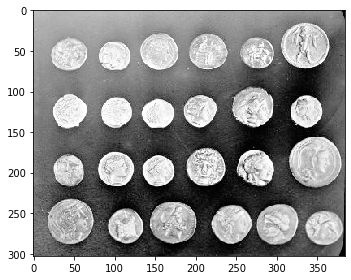

C:\Users\suke0\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


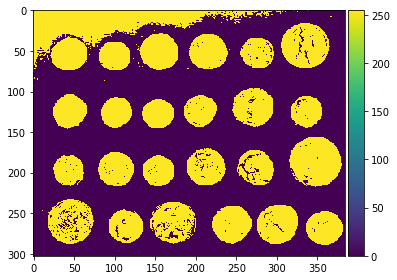

In [9]:
from skimage import exposure
im1 = exposure.equalize_hist(coins) # 画像のコントラスト補正
io.imshow(im1)
io.show()

segmented_img = np.zeros(coins.shape)
mask = coins[:,:] > 0.43*255 # 閾値を0.43*255に
segmented_img[mask] = 255
io.imshow(segmented_img)
io.show()

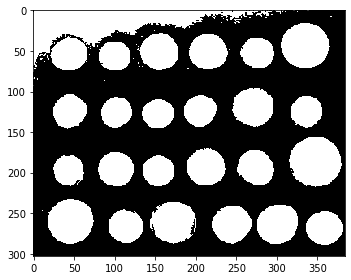

In [10]:
# 境界の内側をぬりつぶすことで、コインの領域を抽出
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(segmented_img)
io.imshow(fill_coins)

[70621  6757     1    16     5     3     1     1     2     1     2     2
     2     2     2     2     3     2     2     1     3    23     1     1
     3  2605     2     1     2     1     1     1     3  1680  1637     1
  1425     1     1     2     2  1227     1  1132     1     1     2     1
     1     1     2     2     2     2     1     2     1     1     3     1
     1     3     3     8     2     1     1     5     3     5     2     1
     3     1     1     3     1     1     1    10     1     3     4     2
     4     1     1     2  1892  1321  1214  1170  1127  1104     3     1
  3096  1721     1  1519  1477  1099  1157     1     1     3  2434  2178
     1  1962  1734  1377     1  1473     1     1     1]


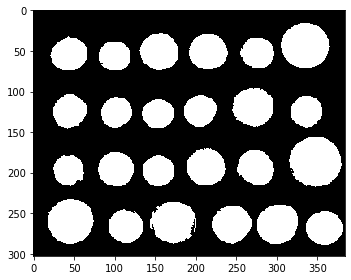

In [11]:
# ラベリング処理をした後、小さすぎる・大きすぎるオブジェクトは削除
from scipy import ndimage as ndi

# ラベリング(label_objectsはラベリング後の画像、nb_labelsはラベルの数)
label_objects, nb_labels = ndi.label(fill_coins)

# 各ラベルの画素の数をカウント
sizes = np.bincount(label_objects.ravel())
print(sizes)

# 小さすぎない・大きすぎない画素数のラベルを抽出
mask_sizes = np.zeros(sizes.shape)
for i in range(len(sizes)):
  mask_sizes[i] = 100<sizes[i] and sizes[i]<5000
coins_cleaned = mask_sizes[label_objects]
io.imshow(coins_cleaned)
io.show()

C:\Users\suke0\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


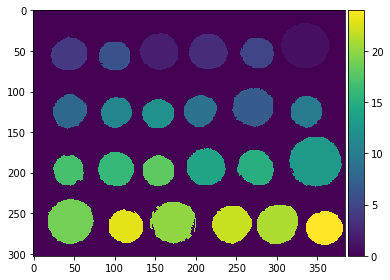

In [12]:
from scipy import ndimage as ndi
labeled_coins, _ = ndi.label(coins_cleaned) # Label all coins one by one
io.imshow(labeled_coins)
io.show()


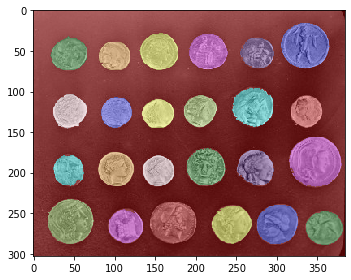

In [13]:
# ラベルごとに独立した色を与えて可視化
from skimage.color import label2rgb
image_label_overlay = label2rgb(labeled_coins, image=coins)
io.imshow(image_label_overlay)
io.show()


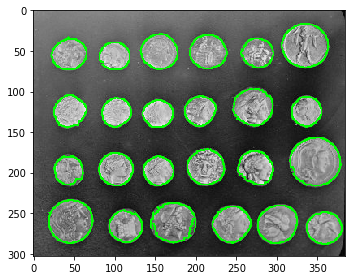

In [14]:
# オブジェクトの境界を可視化
segmentation = coins_cleaned.astype(bool)
contours = segmentation ^ ndi.binary_erosion(segmentation, np.ones((5,5))) #境界

from skimage.color import grey2rgb
coins_rgb = grey2rgb(coins)
coins_rgb[contours] =[0,255,0]
io.imshow(coins_rgb)